<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Proyecto final: Clasificación de residuos usando aprendizaje por Transferencia  



## Tabla de contenidos  

- Clasificación de residuos usando aprendizaje por Transferencia  
- Introducción  
- Descripción del proyecto  
- Objetivo del proyecto  
- Objetivos de aprendizaje  
- Lista de tareas   
  - Instalación de librerías requeridas  
  - Importación de librerías necesarias  

 **Tarea 1:** Imprimir la versión de TensorFlow  

 **Antecedentes**  
  Creación de un modelo para diferenciar imágenes de residuos reciclables y orgánicos  
  - Conjunto de datos  
  - Importación de datos  
  - Definir opciones de configuración  
  - Carga de Imágenes utilizando la Clase `ImageGenerator`  
  - Generadores de datos de imágenes  
- **Tarea 2:** Crear un `test_generator` usando el objeto `test_datagen`  
- **Tarea 3:** Imprimir la longitud del `train_generator`  
- **Modelos Pre-entrenados**  
  - VGG-16  
- **Tarea 4:** Imprimir el resumen del modelo  
- **Tarea 5:** Compilar el modelo  


 **Entrenamiento del modelo**  
   Trazar las curvas de pérdida para los conjuntos de entrenamiento y validación (`extract_feat_model`)  
- **Tarea 6:** Graficar las curvas de precisión para los conjuntos de entrenamiento y validación (`extract_feat_model`)  

 **Ajuste fino del modelo**  
- **Tarea 7:** Graficar las curvas de pérdida para los conjuntos de entrenamiento y validación (`fine tune model`)  
- **Tarea 8:** Graficar las curvas de precisión para los conjuntos de entrenamiento y validación (`fine tune model`)  

 **Evaluación de ambos modelos en datos de prueba**  
- **Tarea 9:** Graficar una imagen de prueba usando el modelo de Extracción de Características (`index_to_plot = 1`)  
- **Tarea 10:** Graficar una imagen de prueba usando el Modelo Ajustado Finamente (`index_to_plot = 1`)  
  





## Introducción  
En este proyecto, clasificarás productos de desecho utilizando aprendizaje por transferencia.  

## Descripción del proyecto  
EcoClean actualmente carece de un método eficiente y escalable para automatizar el proceso de clasificación de residuos. La clasificación manual no solo es laboriosa, sino que también está sujeta a errores, lo que conduce a la contaminación de materiales reciclables.  

El objetivo de este proyecto es aprovechar el aprendizaje automático y la visión por computadora para automatizar la clasificación de residuos, mejorando la eficiencia y reduciendo los índices de contaminación. Se utilizará un modelo preentrenado VGG16 para clasificar imágenes de residuos.  


## Objetivo del proyecto  
El objetivo de este proyecto es desarrollar un modelo automatizado de clasificación de residuos que pueda diferenciar con precisión entre residuos reciclables y orgánicos a partir de imágenes.  

**Resultado final:** Un modelo entrenado que clasifique imágenes de residuos en categorías reciclables y orgánicas.  

## Objetivos de aprendizaje  
Al completar este proyecto, serás capaz de:  

- Aplicar aprendizaje por transferencia utilizando el modelo VGG16 para la clasificación de imágenes.  
- Preparar y preprocesar datos de imágenes para una tarea de aprendizaje automático.  
- Ajustar finamente un modelo preentrenado para mejorar la precisión de clasificación.  
- Evaluar el rendimiento del modelo utilizando métricas apropiadas.  
- Visualizar predicciones del modelo en datos de prueba.  

Estos conocimientos podrán aplicarse en escenarios del mundo real, como la automatización del reciclaje en entornos municipales o industriales.  

## Lista de tareas  
Para lograr los objetivos anteriores, completarás las siguientes tareas:  

1. **Imprimir la versión de TensorFlow.**  
2. **Crear un `test_generator` usando el objeto `test_datagen`.**  
3. **Imprimir la longitud del `train_generator`.**  
4. **Imprimir el resumen del modelo.**  
5. **Compilar el modelo.**  
6. **Graficar las curvas de precisión para los conjuntos de entrenamiento y validación (`extract_feat_model`).**  
7. **Graficar las curvas de pérdida para los conjuntos de entrenamiento y validación (`fine tune model`).**  
8. **Graficar las curvas de precisión para los conjuntos de entrenamiento y validación (`fine tune model`).**  
9. **Graficar una imagen de prueba usando el modelo de Extracción de Características (`index_to_plot = 1`).**  
10. **Graficar una imagen de prueba usando el Modelo Ajustado Finamente (`index_to_plot = 1`).**  



## Configuración  

Para esta practica, utilizaremos las siguientes bibliotecas:  

- **NumPy** para operaciones matemáticas.  
- **Scikit-learn** para funciones relacionadas con aprendizaje automático y pipelines de machine learning.  
- **Matplotlib** para herramientas adicionales de visualización.  
- **TensorFlow** para funciones relacionadas con aprendizaje automático y redes neuronales.  

### Instalación de librerías requeridas  

Ejecuta los siguientes comandos para instalar las versiones específicas de las bibliotecas necesarias:  

In [ ]:
# Instalación de las librerías necesarias en Google Colab
!pip install tensorflow==2.17.0
!pip install numpy==1.24.3
!pip install scikit-learn==1.5.1
!pip install matplotlib==3.9.2

## Importación de librerías requeridas  

Se importan las bibliotecas necesarias para la manipulación de imágenes, construcción del modelo de aprendizaje profundo y evaluación de su desempeño.  



In [ ]:
# Importación de bibliotecas esenciales para manipulación de datos y archivos
import numpy as np  # Operaciones matemáticas y manejo de arrays
import os  # Manejo de rutas y archivos en el sistema operativo
# import random, shutil  # Comentado: se podrían usar para manipulación de archivos aleatorios
import glob  # Búsqueda de archivos basada en patrones

# Bibliotecas para visualización de datos e imágenes
from matplotlib import pyplot as plt  # Gráficos y visualización
from matplotlib import pyplot  # Importación redundante (puede eliminarse)
from matplotlib.image import imread  # Lectura de imágenes

# Desactivación de mensajes de advertencia de TensorFlow para reducir el ruido en la consola
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Importación de TensorFlow y Keras para el desarrollo de redes neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Modelo secuencial en Keras
from tensorflow.keras import optimizers  # Optimizadores para el entrenamiento del modelo
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks para mejorar el entrenamiento
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input  # Capas para redes convolucionales (comentado porque no se usan en este código)
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Capas esenciales para redes neuronales
from tensorflow.keras.models import Sequential, Model  # Modelos en Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generador de datos para imágenes
# from tensorflow.keras.applications import InceptionV3  # Posible modelo preentrenado (comentado porque no se usa aquí)

# Importación de métricas para evaluación del modelo desde Scikit-learn
from sklearn import metrics

# Configuración para ignorar advertencias y evitar mensajes innecesarios en la consola
import warnings
warnings.filterwarnings('ignore')


## **Tarea 1: Imprimir la versión de TensorFlow**  

En esta tarea, verificaremos la versión de TensorFlow instalada en el entorno de ejecución.  


In [ ]:
# Importar TensorFlow
import tensorflow as tf

# Imprimir la versión instalada de TensorFlow
print("Versión de TensorFlow instalada:", tf.__version__)

Versión de TensorFlow instalada: 2.17.0


## **Antecedentes**  

El **aprendizaje por transferencia** (*transfer learning*) es una técnica que consiste en utilizar las capas iniciales de una red neuronal preentrenada y reajustar las capas finales con un nuevo conjunto de datos. Esto permite aprovechar el conocimiento aprendido por la red en una tarea similar y aplicarlo en un nuevo problema.  

### **Flujo de trabajo típico en Keras para Transfer Learning**  
Un procedimiento común para aplicar aprendizaje por transferencia en **Keras** sigue estos pasos:  

1. Inicializar un **modelo base** y cargar pesos preentrenados (por ejemplo, entrenados en *ImageNet*).  
2. "Congelar" las capas del modelo base estableciendo `training = False`, para que no se modifiquen en la nueva fase de entrenamiento.  
3. Definir un **nuevo modelo** agregando capas adicionales sobre la salida del modelo base.  
4. Entrenar el modelo resultante con el nuevo conjunto de datos.  

---

## **Creación de un modelo para distinguir imágenes de residuos reciclables y orgánicos**  

### **Conjunto de datos**  
Para este proyecto, se utilizará el conjunto de datos **Waste Classification Dataset**, que contiene imágenes de distintos tipos de desechos.  

### **Objetivo del modelo**  
Entrenar un algoritmo de clasificación para predecir etiquetas en el conjunto de prueba:  
- **1 = Reciclable**  
- **0 = Orgánico**  

---

## **Importación de datos**  
El siguiente paso consiste en cargar el conjunto de datos y organizarlo en el entorno de trabajo. Esto generará un directorio llamado **`o-vs-r-split`** donde se almacenarán las imágenes de entrenamiento y prueba.  


In [ ]:
import gdown
import zipfile
import os
from tqdm import tqdm

# Enlace de Google Drive (ID del archivo)
file_id = "1JnQ0nTkwpyaQ7Uyxyty4or5p1TG8y4NT"
file_name = "o-vs-r-split-reduced-1200.zip"

# Descargar el archivo desde Google Drive
print("Descargando archivo desde Google Drive...")
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

# Función para extraer el archivo ZIP con barra de progreso
def extract_file_with_progress(file_name, dest_dir="."):
    print("Extrayendo archivo con progreso...")
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        members = zip_ref.infolist()
        with tqdm(total=len(members), unit='archivo') as progress_bar:
            for member in members:
                zip_ref.extract(member, path=dest_dir)
                progress_bar.update(1)
    print("Extracción completada.")

# Extraer archivos
extract_file_with_progress(file_name)

# Eliminar el archivo ZIP después de la extracción
os.remove(file_name)
print("Archivo ZIP eliminado.")

Descargando archivo desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1JnQ0nTkwpyaQ7Uyxyty4or5p1TG8y4NT
To: /content/o-vs-r-split-reduced-1200.zip
100%|██████████| 11.0M/11.0M [00:00<00:00, 95.3MB/s]


Extrayendo archivo con progreso...


100%|██████████| 1207/1207 [00:00<00:00, 4135.37archivo/s]

Extracción completada.
Archivo ZIP eliminado.


# Definir opciones de configuración del modelo





In [ ]:
# Dimensiones de las imágenes de entrada (150x150 píxeles, con 3 canales de color RGB)
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

# Tamaño del lote de entrenamiento
batch_size = 32

# Número de épocas (iteraciones de entrenamiento)
n_epochs = 10

# Número de clases (2: Orgánico y Reciclable)
n_classes = 2

# Porcentaje de datos que se usará para validación (20%)
val_split = 0.2

# Nivel de verbosidad para la salida en consola
verbosity = 1

# Rutas de los conjuntos de datos (asegúrate de que las carpetas existen en tu entorno)
path = "/content/o-vs-r-split/train/"  # Ruta de entrenamiento en Colab
path_test = "/content/o-vs-r-split/test/"  # Ruta del conjunto de prueba en Colab

# Etiquetas del dataset: "O" (Orgánico), "R" (Reciclable)
labels = ['O', 'R']

# Semilla para asegurar reproducibilidad en la aleatorización de los datos
seed = 42

### 📌 Carga de imágenes usando `ImageDataGenerator`
 El aprendizaje por transferencia funciona mejor en conjuntos de datos más pequeños.

### Estructura esperada del directorio:
 o-vs-r-split/

 ├── train/

 │   ├── O/  (Orgánico)

 │   ├── R/  (Reciclable)

 ├── test/

 │   ├── O/

 │   ├── R/


 Importamos la clase `ImageDataGenerator` de TensorFlow Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator






In [ ]:
# Generador de imágenes para el conjunto de entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    validation_split=val_split,  # Separamos el 20% de los datos para validación
    rescale=1.0 / 255.0,  # Normalizamos los valores de píxeles al rango [0,1]
    width_shift_range=0.1,  # Permite desplazamientos horizontales aleatorios de hasta un 10%
    height_shift_range=0.1,  # Permite desplazamientos verticales aleatorios de hasta un 10%
    horizontal_flip=True  # Aplica volteo horizontal aleatorio a las imágenes
)

# Generador de imágenes para el conjunto de validación (sin aumentos, solo normalización)
val_datagen = ImageDataGenerator(
    validation_split=val_split,  # Separamos el mismo porcentaje de validación (20%)
    rescale=1.0 / 255.0  # Normalización de los píxeles
)

# Generador de imágenes para el conjunto de prueba (solo normalización, sin aumentos)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalización de los píxeles para el conjunto de prueba
)


In [ ]:
# Generador de imágenes para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    directory=path,  # Ruta del conjunto de datos de entrenamiento
    seed=seed,  # Fijamos la semilla para reproducibilidad
    batch_size=batch_size,  # Tamaño del lote de imágenes en cada iteración
    class_mode='binary',  # Clasificación binaria (0 = orgánico, 1 = reciclable)
    shuffle=True,  # Mezcla aleatoria de las imágenes en cada época
    target_size=(img_rows, img_cols),  # Redimensionamos las imágenes al tamaño especificado (150x150)
    subset='training'  # Especificamos que estas imágenes pertenecen al conjunto de entrenamiento
)

Found 800 images belonging to 2 classes.


In [ ]:
# 📌 Generador de imágenes para el conjunto de validación
val_generator = val_datagen.flow_from_directory(
    directory=path,  # Ruta del conjunto de datos de entrenamiento (de donde se extraerá la validación)
    seed=seed,  # Fijamos la semilla para reproducibilidad
    batch_size=batch_size,  # Tamaño del lote de imágenes en cada iteración
    class_mode='binary',  # Clasificación binaria (0 = orgánico, 1 = reciclable)
    shuffle=True,  # Mezcla aleatoria de las imágenes en cada época
    target_size=(img_rows, img_cols),  # Redimensionamos las imágenes al tamaño especificado (150x150)
    subset='validation'  # Especificamos que estas imágenes pertenecen al conjunto de validación
)

Found 200 images belonging to 2 classes.


## 📌 Tarea 2: Crear un `test_generator` usando el objeto `test_datagen`

Sube la captura de pantalla del código y la salida del generador de prueba con el nombre **test_generator.png**.

### 📌 Parámetros requeridos:
- `directory` debe establecerse en `path_test`.
- `class_mode` debe establecerse en `'binary'`.
- `seed` debe establecerse en `seed`.
- `batch_size` debe establecerse en `batch_size`.
- `shuffle` debe establecerse en `False`.
- `target_size` debe establecerse en `(img_rows, img_cols)`.

### 📌 Formato sugerido:
```python
test_generator = test_datagen.flow_from_directory(
    directory=path_test,
    class_mode='binary',
    seed=seed,
    batch_size=batch_size,
    shuffle=False,
    target_size=(img_rows, img_cols)
)



In [ ]:
# Crear el generador de datos para el conjunto de prueba
# Utilizamos `test_datagen` para cargar las imágenes de prueba sin aplicar transformaciones,
# solo escalando los valores de píxeles al rango [0,1].

test_generator = test_datagen.flow_from_directory(
    directory=path_test,  #  Ruta del directorio de imágenes de prueba
    class_mode='binary',   #  Clasificación binaria (0 = orgánico, 1 = reciclable)
    seed=seed,             #  Semilla para garantizar reproducibilidad en la selección de datos
    batch_size=batch_size, #  Número de imágenes procesadas por lote
    shuffle=False,         #  No aleatorizamos el orden, útil para evaluaciones posteriores
    target_size=(img_rows, img_cols)  #  Redimensionamos imágenes a 150x150 píxeles
)

Found 200 images belonging to 2 classes.


## 📌 Tarea 3: Imprimir la longitud del generador de entrenamiento
 La longitud del generador indica cuántos lotes (batches) hay en el conjunto de entrenamiento.



In [ ]:
print(f"Número de lotes en el generador de entrenamiento: {len(train_generator)}")

Número de lotes en el generador de entrenamiento: 25


## 📌 Visualización de imágenes aumentadas
 Vamos a observar algunas imágenes aumentadas generadas por el `ImageDataGenerator`.


Etiquetas: ['O', 'O', 'O', 'O', 'O']


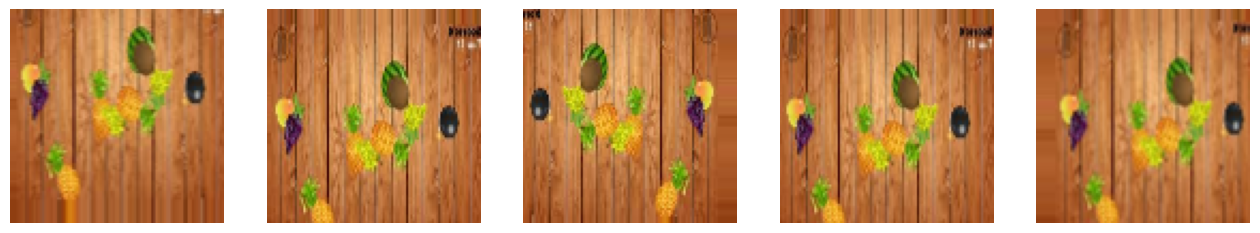

In [ ]:
from pathlib import Path  # Módulo para manejar rutas de archivos

# Definir las dimensiones de las imágenes
IMG_DIM = (100, 100)

# Obtener una lista de archivos de imágenes de la clase "O" (orgánico) en el conjunto de entrenamiento
train_files = glob.glob('./o-vs-r-split/train/O/*')
train_files = train_files[:20]  # Seleccionar solo las primeras 20 imágenes

# Cargar y convertir las imágenes a arreglos numpy
train_imgs = [tf.keras.preprocessing.image.img_to_array(
    tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

# Obtener las etiquetas de las imágenes
train_labels = [Path(fn).parent.name for fn in train_files]

# Seleccionar una imagen específica para visualizar sus variaciones aumentadas
img_id = 0

# Crear un generador de datos para la imagen seleccionada
O_generator = train_datagen.flow(
    train_imgs[img_id:img_id+1],  # Imagen seleccionada
    train_labels[img_id:img_id+1],  # Etiqueta correspondiente
    batch_size=1  # Tamaño del lote de 1 imagen
)

# Generar 5 versiones aumentadas de la imagen seleccionada
O = [next(O_generator) for i in range(5)]

# Graficar las imágenes generadas
fig, ax = plt.subplots(1, 5, figsize=(16, 6))  # Crear una figura con 5 subgráficos

# Imprimir las etiquetas de las imágenes generadas
print('Etiquetas:', [item[1][0] for item in O])

# Mostrar cada una de las imágenes aumentadas
for i in range(5):
    ax[i].imshow(O[i][0][0])
    ax[i].axis('off')  # Ocultar los ejes

plt.show()  # Mostrar la figura con las imágenes


## Modelos Pre-entrenados  

Los modelos pre-entrenados son redes previamente entrenadas en grandes conjuntos de datos. Generalmente, se utilizan para tareas de clasificación de imágenes a gran escala. Pueden emplearse tal como están o personalizarse para una tarea específica mediante aprendizaje por transferencia. Estos modelos pre-entrenados forman la base del aprendizaje por transferencia.

### VGG-16  
Vamos a cargar el modelo VGG16.



In [ ]:
# Importamos el modelo VGG16 desde la biblioteca de aplicaciones preentrenadas de Keras
from tensorflow.keras.applications import vgg16

# Definimos la forma de entrada de las imágenes (150x150 píxeles con 3 canales de color)
input_shape = (150, 150, 3)

# Cargamos el modelo VGG16 preentrenado con los pesos de ImageNet
# - include_top=False: Se excluyen las capas densas superiores para poder personalizar la red
# - weights='imagenet': Se usan los pesos preentrenados en el dataset ImageNet
# - input_shape=input_shape: Se define la forma de las imágenes de entrada
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Aplanamos la salida del modelo VGG y la asignamos a la salida del modelo. Luego, utilizamos un objeto `Model` llamado `basemodel` para agrupar las capas en un objeto que será utilizado tanto para entrenamiento como para inferencia.  

#### Entradas y salidas del modelo:

- **Entradas:** `vgg.input`  
- **Salidas:** `tf.keras.layers.Flatten()(output)`
`


In [ ]:
# Extraemos la salida de la última capa del modelo VGG16
output = vgg.layers[-1].output

# Aplanamos la salida para convertirla en un vector unidimensional
output = tf.keras.layers.Flatten()(output)

# Creamos un modelo base utilizando como entrada la del modelo VGG16
# y como salida la capa aplanada generada anteriormente.
basemodel = Model(inputs=vgg.input, outputs=output)

A continuación, congela el modelo base.




In [ ]:
# Recorremos todas las capas del modelo base y las configuramos como no entrenables.
# Esto significa que sus pesos no se actualizarán durante el entrenamiento,
# conservando así el conocimiento adquirido en el preentrenamiento.
for layer in basemodel.layers:
    layer.trainable = False

####Creación de un nuevo modelo sobre la base existente
Para mejorar la capacidad de generalización del modelo y evitar el sobreajuste, agreguemos una capaDropoutcomo de costumbretraining=False).


In [ ]:
# Obtención de la forma de salida del modelo base
input_shape = basemodel.output_shape[1]

# Creación del modelo secuencial
model = Sequential()

# Agregar el modelo base preentrenado
model.add(basemodel)

# Primera capa densa con activación ReLU
model.add(Dense(512, activation='relu'))

# Capa Dropout para evitar el sobreajuste (30% de neuronas desactivadas)
model.add(Dropout(0.3))

# Segunda capa densa con activación ReLU
model.add(Dense(512, activation='relu'))

# Segunda capa Dropout
model.add(Dropout(0.3))

# Capa de salida con activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))


## Tarea 4: Imprimir el resumen del modelo
Para visualizar la arquitectura del modelo, incluyendo la cantidad de parámetros entrenables y no entrenables, utilizamos el método summary().

In [ ]:
# Imprimir el resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional (Functional)              │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Tarea 5: Compilar el modelo
Para compilar el modelo, utilizamos el método compile()con los siguientes parámetros:

loss: 'binary_crossentropy', ya que estamos realizando una clasificación binaria.

optimizer: optimizers.RMSprop(learning_rate=1e-4), para ajustar los pesos del modelo.

metrics: ['accuracy'], para evaluar el rendimiento del modelo durante el entrenamiento.

In [ ]:
# Congelar las capas del modelo base para evitar que se entrenen
for layer in basemodel.layers:
    layer.trainable = False

# Compilar el modelo con los parámetros especificados
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

Para evitar el sobreentrenamiento del modelo, utilizaremos Early Stopping. Esta técnica monitorea el desempeño del modelo en el conjunto de validación y detiene el entrenamiento si no se observa mejora después de un número determinado de épocas.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

# Ruta donde se guardará el mejor modelo
checkpoint_path = 'O_R_tlearn_vgg16.keras'

# Definición de la clase para registrar el historial de pérdida y tasa de aprendizaje
class LossHistory_(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        """Inicializa listas para almacenar la pérdida y la tasa de aprendizaje."""
        self.losses = []
        self.lr = []

    def on_epoch_end(self, epoch, logs={}):
        """Almacena la pérdida y la tasa de aprendizaje después de cada época."""
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(epoch))
        print('lr:', exp_decay(len(self.losses)))  # Imprime la tasa de aprendizaje actual

# Función de reducción exponencial de la tasa de aprendizaje
def exp_decay(epoch):
    """Calcula la tasa de aprendizaje en función de la época."""
    initial_lrate = 1e-4  # Tasa de aprendizaje inicial
    k = 0.1  # Factor de decaimiento
    lrate = initial_lrate * np.exp(-k * epoch)  # Cálculo de la nueva tasa de aprendizaje
    return lrate

# Callback para programar la tasa de aprendizaje
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)

# Lista de callbacks que se utilizarán durante el entrenamiento
keras_callbacks = [
    EarlyStopping(
        monitor='val_loss',  # Se detiene si la pérdida de validación deja de mejorar
        patience=4,          # Número de épocas sin mejora antes de detener
        mode='min',          # Se busca minimizar la pérdida
        min_delta=0.01       # Se requiere una mejora mínima de 0.01
    ),
    ModelCheckpoint(
        checkpoint_path,     # Ruta de guardado del modelo
        monitor='val_loss',  # Se guarda el modelo con menor pérdida en validación
        save_best_only=True, # Solo guarda el mejor modelo encontrado
        mode='min'           # Se busca minimizar la pérdida
    )
]

# Lista final de callbacks
callbacks_list_ = [loss_history_, lrate_] + keras_callbacks

## Entrenamiento del modelo
En esta sección, ajustamos y entrenamos el modelo utilizando los generadores de imágenes de entrenamiento y validación.

####📌 **Parámetros de entrenamiento**
Generador de entrenamiento (train_generator): Proporciona imágenes de entrenamiento en lotes.

steps_per_epoch=5: Se procesarán 5 lotes por época.

epochs=10: Se entrenará el modelo durante 10 épocas.

callbacks=callbacks_list_: Se aplican estrategias de parada anticipada, ajuste de tasa de aprendizaje y guardado del mejor modelo.

Generador de validación ( val_generator) : Se usa para evaluar el modelo tras cada época.

validation_steps=val_generator.samples // batch_size: Número de pasos en validación basado en el tamaño del lote.

verbose=1: Muestra información detallada del entrenamiento en consola.


In [ ]:
# Entrenamiento del modelo con generadores de datos
extract_feat_model = model.fit(
    train_generator,                  # Generador de imágenes de entrenamiento
    steps_per_epoch=5,                 # Número de lotes por época
    epochs=10,                          # Número total de épocas
    callbacks=callbacks_list_,          # Callbacks para mejorar el entrenamiento
    validation_data=val_generator,      # Datos de validación
    validation_steps=val_generator.samples // batch_size,  # Pasos de validación por época
    verbose=1                            # Nivel de salida en consola
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5611 - loss: 0.6858lr: 9.048374180359596e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 100s 22s/step - accuracy: 0.5676 - loss: 0.6803 - val_accuracy: 0.7344 - val_loss: 0.5409 - learning_rate: 1.0000e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6653 - loss: 0.5902lr: 8.187307530779819e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 91s 21s/step - accuracy: 0.6701 - loss: 0.5882 - val_accuracy: 0.8125 - val_loss: 0.4398 - learning_rate: 9.0484e-05
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7525 - loss: 0.4997lr: 7.408182206817179e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 91s 21s/step - accuracy: 0.7542 - loss: 0.4975 - val_accuracy: 0.7812 - val_loss: 0.4308 - learning_rate: 8.1873e-05
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7980 - loss: 0.4340lr: 6.703200460356394e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 142s 33s/step - accuracy: 0.7931 - loss: 0.4419 - val_accuracy: 0.8542 - val_loss: 0.3917 - learning_rate: 7.4082e-05
Epoch

### 📊 Gráfica de curvas de pérdida
En esta sección, visualizamos la evolución de la función de pérdida durante el entrenamiento y la validación para evaluar el rendimiento del modelo.



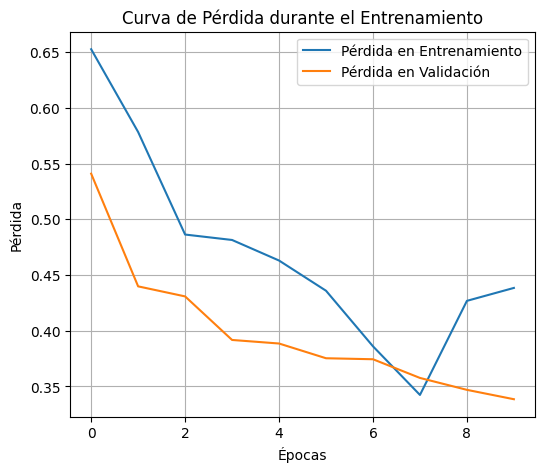

In [ ]:
import matplotlib.pyplot as plt

# Obtener historial del entrenamiento
history = extract_feat_model

# Crear figura para la gráfica
plt.figure(figsize=(6, 5))

# Graficar la pérdida del entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')

# Configuración de la gráfica
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

### 6. 📈 Gráfica de curvas de precisión  

En esta sección, se visualiza la evolución de la precisión del modelo en el conjunto de entrenamiento y validación a lo largo de las épocas.  



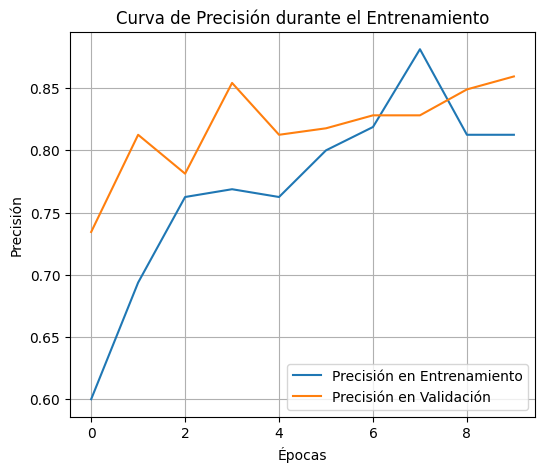

In [ ]:
import matplotlib.pyplot as plt

# Obtener historial del entrenamiento
history = extract_feat_model

# Crear figura para la gráfica
plt.figure(figsize=(6, 5))

# Graficar la precisión en entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')

# Configuración de la gráfica
plt.title('Curva de Precisión durante el Entrenamiento')  # Título del gráfico
plt.xlabel('Épocas')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Activar la cuadrícula para mejor visualización

# Mostrar la gráfica
plt.show()

## 🔧 Ajuste fino del modelo (Fine-Tuning)  

El ajuste fino es un paso opcional dentro del aprendizaje por transferencia (`Transfer Learning`), pero generalmente mejora el rendimiento del modelo.  

### 📌 Objetivo  
- Descongelar una capa específica del modelo base (`block5_conv3`) para permitir su entrenamiento.  
- Mantener el resto de las capas congeladas para preservar los pesos preentrenados.  





In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow as tf

# Definir la forma de entrada de las imágenes
input_shape = (150, 150, 3)

# Cargar el modelo preentrenado VGG16 sin la parte superior
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

# Extraer la última capa y aplanarla
output = tf.keras.layers.Flatten()(vgg.layers[-1].output)

# Crear el modelo base
basemodel = Model(vgg.input, output)

# Congelar todas las capas del modelo base
for layer in basemodel.layers:
    layer.trainable = False

# Mostrar el nombre de las capas del modelo base
display([layer.name for layer in basemodel.layers])

# Inicializar variable de control para activar el entrenamiento de una capa específica
set_trainable = False

# Descongelar únicamente la capa 'block5_conv3'
for layer in basemodel.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True  # Activar entrenamiento a partir de esta capa
    layer.trainable = set_trainable  # Asignar estado entrenable

# Imprimir el estado de entrenamiento de cada capa
for layer in basemodel.layers:
    print(f"{layer.name}: {layer.trainable}")

['input_layer_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool',
 'flatten_1']

input_layer_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: False
block5_conv2: False
block5_conv3: True
block5_pool: True
flatten_1: True


### Creación de un nuevo modelo con `Fine-Tuning`  

Después de haber descongelado la capa `block5_conv3` en el modelo base `VGG16`, se procederá a construir un nuevo modelo sobre él.  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Definir el modelo secuencial agregando el modelo base
model = Sequential([
    basemodel,  # Modelo base con fine-tuning
    Dense(512, activation='relu'),  # Capa densa con 512 neuronas y activación ReLU
    Dropout(0.3),  # Capa Dropout para evitar sobreajuste
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Definir el path para guardar los mejores pesos del modelo
checkpoint_path = 'O_R_tlearn_fine_tune_vgg16.keras'

# Definir los callbacks
loss_history_ = LossHistory_()  # Historial de pérdida
lrate_ = LearningRateScheduler(exp_decay)  # Programador de tasa de aprendizaje

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, mode='min', min_delta=0.01),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

# Lista de callbacks
callbacks_list_ = [loss_history_, lrate_] + keras_callbacks

# Compilar el modelo con función de pérdida, optimizador y métrica de precisión
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Entrenar el modelo con los generadores de datos
fine_tune_model = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=10,
    callbacks=callbacks_list_,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    verbose=1
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4690 - loss: 0.8388lr: 9.048374180359596e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 117s 25s/step - accuracy: 0.4804 - loss: 0.8292 - val_accuracy: 0.5990 - val_loss: 0.6043 - learning_rate: 1.0000e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7003 - loss: 0.5660lr: 8.187307530779819e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 137s 32s/step - accuracy: 0.7023 - loss: 0.5666 - val_accuracy: 0.8281 - val_loss: 0.4856 - learning_rate: 9.0484e-05
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7937 - loss: 0.4582 lr: 7.408182206817179e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 138s 31s/step - accuracy: 0.7917 - loss: 0.4597 - val_accuracy: 0.8542 - val_loss: 0.4172 - learning_rate: 8.1873e-05
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8299 - loss: 0.4713lr: 6.703200460356394e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 91s 21s/step - accuracy: 0.8280 - loss: 0.4708 - val_accuracy: 0.8906 - val_loss: 0.3589 - learning_rate: 7.4082e-05
Ep

### 📉 Tarea 7: Graficar las curvas de pérdida para el modelo `Fine-Tuning`  

### 📌 Objetivo  
Subir una captura de pantalla del código y la salida de la gráfica de la curva de pérdida como **plot_loss_curve.png**.  

### 💡 Pista  
Utiliza `plt.plot()` para graficar las curvas de pérdida para los conjuntos de **entrenamiento** y **validación**.  

### 🔍 Nota  
Dado que el entrenamiento es un proceso **estocástico**, las gráficas de pérdida y precisión pueden **diferir entre ejecuciones**.  
Mientras la tendencia general muestre una **disminución de la pérdida** y un **aumento en la precisión**, el modelo se considera correctamente ajustado.  


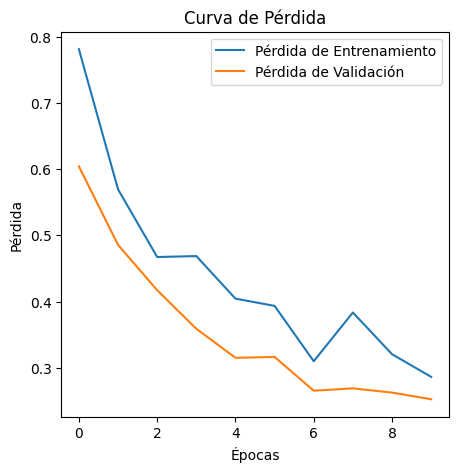

In [ ]:
# Se obtiene el historial del entrenamiento del modelo fine-tuning
history = fine_tune_model

# Configuración del gráfico
plt.figure(figsize=(5, 5))  # Define el tamaño de la figura

# Se grafican las curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')  # Pérdida durante el entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de Validación')  # Pérdida durante la validación

# Se añaden títulos y etiquetas
plt.title('Curva de Pérdida')  # Título de la gráfica
plt.xlabel('Épocas')  # Etiqueta del eje X
plt.ylabel('Pérdida')  # Etiqueta del eje Y
plt.legend()  # Muestra la leyenda de la gráfica

# Se muestra la gráfica
plt.show()

### 📌 Tarea 8: Graficar curvas de precisión para los conjuntos de entrenamiento y validación (modelo fine-tuning)

Carga la captura de pantalla del código y la gráfica de la curva de precisión del modelo de fine-tuning con el nombre **plot_finetune_model.png**.

## 💡 Pista:
Similar a las curvas de pérdida, utiliza `plt.plot()` para graficar las curvas de precisión de entrenamiento y validación.




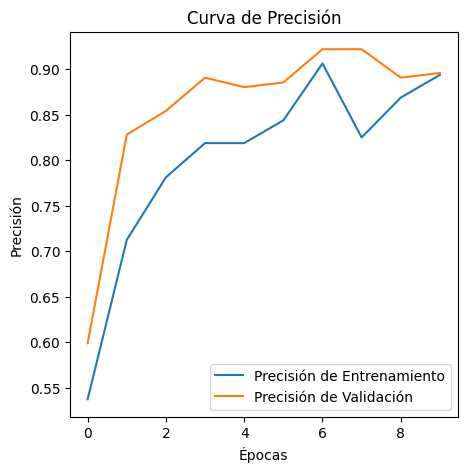

In [ ]:
# Se obtiene el historial del entrenamiento del modelo fine-tuning
history = fine_tune_model

# Configuración del gráfico
plt.figure(figsize=(5, 5))  # Define el tamaño de la figura

#  Se grafican las curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')  # Precisión en entrenamiento
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')  # Precisión en validación

# Se añaden títulos y etiquetas
plt.title('Curva de Precisión')  # Título de la gráfica
plt.xlabel('Épocas')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()  # Muestra la leyenda de la gráfica

# Se muestra la gráfica
plt.show()

## 📌 Evaluar ambos modelos con datos de prueba

1. **Cargar los modelos guardados**  
2. **Cargar las imágenes de prueba**  
3. **Realizar predicciones con ambos modelos**  
4. **Convertir las predicciones en etiquetas de clase**  
5. **Imprimir el informe de clasificación para ambos modelos**  



In [ ]:
from pathlib import Path

# Cargar modelos guardados
extract_feat_model = tf.keras.models.load_model('O_R_tlearn_vgg16.keras')
fine_tune_model = tf.keras.models.load_model('O_R_tlearn_fine_tune_vgg16.keras')

# Definir tamaño de las imágenes
IMG_DIM = (150, 150)

# Cargar imágenes de prueba
test_files_O = glob.glob('./o-vs-r-split/test/O/*')  # Obtener imágenes de la clase 'O'
test_files_R = glob.glob('./o-vs-r-split/test/R/*')  # Obtener imágenes de la clase 'R'

# Seleccionar un subconjunto equilibrado de imágenes de ambas clases
test_files = test_files_O[:50] + test_files_R[:50]

# Preprocesar imágenes de prueba: cargar, convertir a array y escalar
test_imgs = np.array([
    tf.keras.preprocessing.image.img_to_array(
        tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)
    ) for img in test_files
])

# Normalizar los valores de píxeles al rango [0,1]
test_imgs_scaled = test_imgs.astype('float32') / 255.0

# Obtener etiquetas de las imágenes
test_labels = [Path(fn).parent.name for fn in test_files]

# Funciones para codificar y decodificar etiquetas
class2num = lambda labels: [0 if lbl == 'O' else 1 for lbl in labels]  # 'O' → 0, 'R' → 1
num2class = lambda preds: ['O' if p < 0.5 else 'R' for p in preds]  # Convertir probabilidades a etiquetas

# Convertir etiquetas reales a formato numérico
test_labels_enc = class2num(test_labels)

# Realizar predicciones con ambos modelos
preds_extract_feat = extract_feat_model.predict(test_imgs_scaled, verbose=0)
preds_fine_tune = fine_tune_model.predict(test_imgs_scaled, verbose=0)

# Convertir predicciones en etiquetas de clase
pred_labels_extract_feat = num2class(preds_extract_feat)
pred_labels_fine_tune = num2class(preds_fine_tune)

# Imprimir informes de clasificación para ambos modelos
print(' Modelo de Extracción de Características')
print(metrics.classification_report(test_labels, pred_labels_extract_feat))

print(' Modelo Fine-Tuning')
print(metrics.classification_report(test_labels, pred_labels_fine_tune))



📊 Modelo de Extracción de Características
              precision    recall  f1-score   support

           O       0.85      0.80      0.82        50
           R       0.81      0.86      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

📊 Modelo Fine-Tuning
              precision    recall  f1-score   support

           O       0.83      0.90      0.87        50
           R       0.89      0.82      0.85        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



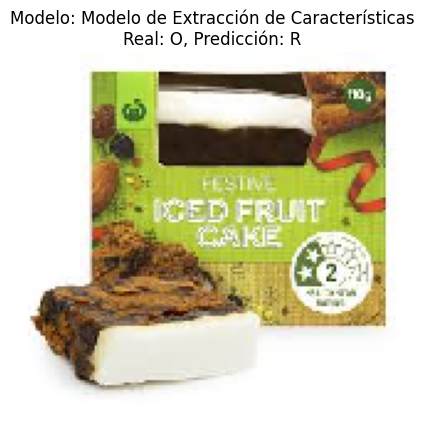

In [ ]:
# Función para graficar una imagen con la etiqueta real y la predicción del modelo
def plot_image_with_title(image, model_name, actual_label, predicted_label):
    """
    Muestra una imagen con su etiqueta real y la predicción del modelo en el título.

    Parámetros:
    - image: Imagen a mostrar (array de píxeles).
    - model_name: Nombre del modelo que realizó la predicción.
    - actual_label: Etiqueta real de la imagen.
    - predicted_label: Etiqueta predicha por el modelo.
    """
    plt.imshow(image)
    plt.title(f"Modelo: {model_name}\nReal: {actual_label}, Predicción: {predicted_label}")
    plt.axis('off')  # Ocultar los ejes para mejorar la visualización
    plt.show()

# Índice de la imagen a visualizar (por ejemplo, la primera imagen del conjunto de prueba)
index_to_plot = 0

# Graficar la imagen con el modelo de extracción de características
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),  # Convertir la imagen a valores enteros para su visualización
    model_name='Modelo de Extracción de Características',
    actual_label=test_labels[index_to_plot],
    predicted_label=pred_labels_extract_feat[index_to_plot]
)

### 📌 Tarea 9: Graficar una imagen de prueba usando el Modelo de Extracción de Características (index_to_plot = 1)

1. Utiliza la función `plot_image_with_title`.
2. Define `index_to_plot = 1` para seleccionar la segunda imagen del conjunto de prueba.
3. Especifica el modelo como `'Modelo de Extracción de Características'`.
4. Usa `predicted_label = predictions_extract_feat_model[index_to_plot]` para obtener la predicción del modelo.
5. Sigue el mismo formato de los gráficos anteriores.

---

🔍 **Nota:**  
Debido a la naturaleza de las redes neuronales, las predicciones pueden diferir de las etiquetas reales. Por ejemplo, si la etiqueta real es `'O'`, la predicción puede ser tanto `'O'` como `'R'`, ya que ambos son resultados posibles. Se otorgará la calificación completa siempre que el procedimiento sea correcto.



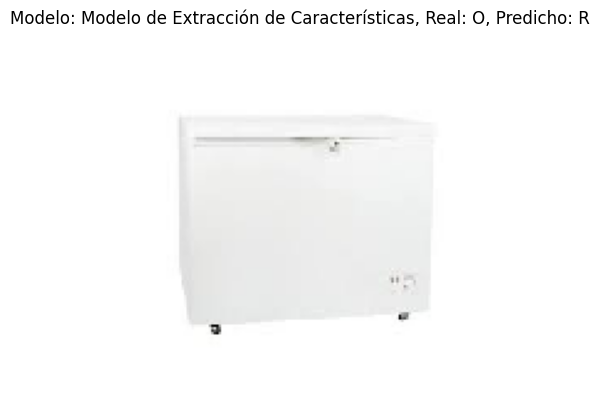

In [ ]:
import matplotlib.pyplot as plt

def plot_image_with_title(image, model_name, actual_label, predicted_label):
    """
    Función para graficar una imagen con el título que indica el modelo utilizado,
    la etiqueta real y la etiqueta predicha.

    Parámetros:
    - image: imagen en formato de matriz numpy.
    - model_name: nombre del modelo que realizó la predicción.
    - actual_label: etiqueta real de la imagen.
    - predicted_label: etiqueta predicha por el modelo.

    Retorno:
    - Muestra la imagen con el título correspondiente.
    """
    plt.imshow(image)  # Muestra la imagen
    plt.title(f"Modelo: {model_name}, Real: {actual_label}, Predicho: {predicted_label}")  # Asigna el título
    plt.axis('off')  # Oculta los ejes
    plt.show()  # Muestra la imagen

# Especificar el índice de la imagen a graficar (segunda imagen del conjunto de prueba)
index_to_plot = 1

# Llamar a la función para graficar la imagen con la etiqueta real y predicha
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Modelo de Extracción de Características',
    actual_label=test_labels[index_to_plot],
    predicted_label=pred_labels_extract_feat[index_to_plot],  # ← Usar el nombre correcto
)

### Tarea 10: Graficar una imagen de prueba usando el Modelo Ajustado (Fine-Tuned Model)

- Utiliza la función `plot_image_with_title`.
- Establece `index_to_plot = 1`.
- Usa `model_name='Fine-Tuned Model'`.
- Asigna `predicted_label=predictions_fine_tune_model[index_to_plot]`.

#### Pista:
Sigue el mismo formato utilizado en las gráficas anteriores.

#### NOTA:
Debido a la naturaleza inherente de las redes neuronales, las predicciones pueden diferir de las etiquetas reales. Por ejemplo, si la etiqueta real es ‘O’, la predicción podría ser ‘O’ o ‘R’, ambos resultados son posibles. Mientras la tendencia general del modelo sea adecuada, se otorgará la calificación completa por la tarea.


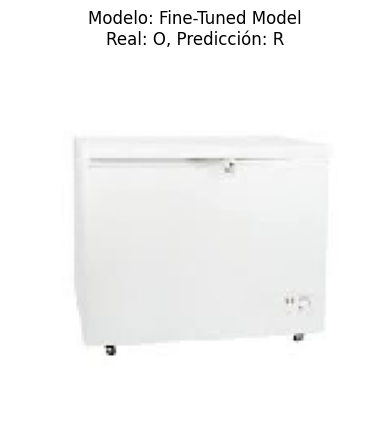

In [ ]:
import matplotlib.pyplot as plt

def plot_image_with_title(image, model_name, actual_label, predicted_label):
    """
    Muestra una imagen con su etiqueta real y la etiqueta predicha en el título.

    Parámetros:
    - image: Imagen en formato de array.
    - model_name: Nombre del modelo utilizado para la predicción.
    - actual_label: Etiqueta real de la imagen.
    - predicted_label: Etiqueta predicha por el modelo.
    """
    plt.imshow(image)
    plt.title(f"Modelo: {model_name}\nReal: {actual_label}, Predicción: {predicted_label}")
    plt.axis('off')  # Ocultar los ejes para una visualización más limpia
    plt.show()

# Definir el índice de la imagen a graficar (en este caso, la imagen con índice 1)
index_to_plot = 1

# Llamar a la función para graficar la imagen con la predicción del modelo Fine-Tuned
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),  # Convertir la imagen a formato entero sin signo
    model_name='Fine-Tuned Model',  # Nombre del modelo utilizado
    actual_label=test_labels[index_to_plot],  # Etiqueta real de la imagen
    predicted_label=pred_labels_fine_tune[index_to_plot],  # ← Usar el nombre correcto
)

## <a id='toc1_14_'></a>[Author: Ing. Leon](https://www.linkedin.com/in/mbaeduleon/)

Copyright © IBM Corporation. All rights reserved.
